In [59]:
import sklearn
from sklearn.decomposition import TruncatedSVD #TRUNcated is version of svd  comperssion
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing  import Normalizer
import pandas as pd
import numpy as np

In [60]:
#create data set

In [61]:
ds = [ " cyber security is super fun " ,
       " sklearn is super cool " ,
       " meachine learning is fun " ,
       " cyber security is cool, too ",
       " mechine learning is fun for cyber security" ,
       " python is great for mechine learning " ,
       " i like karate " ,
        " soccer is greate to watch" ]

#"cyber security is super fun " as feature vector lets keep on tack (  "cyber" ,"security" ,"is" ,"super" , "fun" ) these 
# sentences in left of of data 



In [62]:
#create a vectorizer

In [63]:
vectorizer = CountVectorizer(min_df = 1 , stop_words  = 'english') 

#the min no.of times that word apper in the document, 
##so every word should apper at least one in one document or sentences (min_df = 1  )
#then remove stop words , stop word are words that are very comman so that they dont provide an value like ("the" , "a")

In [64]:
vectorizer

CountVectorizer(stop_words='english')

In [65]:
#Now apply vectorrizer to the dataset

In [66]:
ds_vec = vectorizer.fit_transform(ds)

In [67]:
ds_vec

<8x16 sparse matrix of type '<class 'numpy.int64'>'
	with 27 stored elements in Compressed Sparse Row format>

In [68]:
pd.DataFrame(ds_vec.toarray() , index= ds , columns = vectorizer.get_feature_names()).head(10) 

,cool,cyber,fun,great,greate,karate,learning,like,meachine,mechine,python,security,sklearn,soccer,super,watch
cyber security is super fun,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0
sklearn is super cool,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
meachine learning is fun,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0
"cyber security is cool, too",1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
mechine learning is fun for cyber security,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0
python is great for mechine learning,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0
i like karate,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
soccer is greate to watch,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1


In [69]:
#lets compress the features
# compressing the 15 - 16 fetures in date into just 2 features 
#trancated fuc is useful to convert the feature data

In [70]:
compress_svd = TruncatedSVD(2)
#lets applay trancated fuc into data
ds_compress = compress_svd.fit_transform(ds_vec)
ds_norm = Normalizer(copy=False).fit_transform(ds_compress )

In [71]:
ds_norm

array([[ 0.88924161, -0.45743781],
       [ 0.40696513, -0.9134437 ],
       [ 0.80743537,  0.58995604],
       [ 0.77860988, -0.62750829],
       [ 0.98424344,  0.17681871],
       [ 0.50370992,  0.86387286],
       [-0.26956549, -0.96298206],
       [ 0.17468817,  0.98462381]])

In [73]:
#each sentences now represented by in two features 

In [74]:
ds_fin = pd.DataFrame(ds_norm , index = ds , columns = ["F1" , "F2" ] )

In [75]:
x1= [ i[0] for i  in ds_norm ]

In [76]:
x2 = [i[1] for i in ds_norm  ] 

In [77]:
#plot the matrix

In [78]:
import matplotlib.pyplot as plt

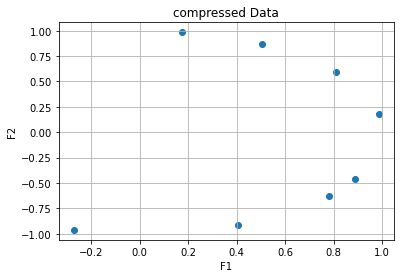

In [80]:
plt.scatter( x1 , x2)
plt.xlabel("F1")
plt.ylabel("F2")
plt.title("compressed Data")
plt.grid()

In [ ]:
#think like some dots belogs to "malware" -> one cluster(group of data ) and some dots are without malware -> onther cluster

In [ ]:
#now need to apply Kmeans algorithm to discover some clusters
#i wanted 2 clusters in (depends how deep u want to go  into data)  and 
#initialization should be random that basicly means that you know  the kMeans  clustering points on graph and 
#it picks them at random and then it starts looking for clusters untilit finds some in this case that initilization should
#be random so , for random you wana provide some value like try 10 different random numbers when doing this cluster 
#so, its like 10 iterations basically  untile figure out some thing that seems optiimal in the algorithm 
#so , init i'm  gona set to be 10 
# and the algorithm should run maximum iterations , i took small dataset so it doesnt need that many iterations 
# so, i m taking 300 ma iter 

In [24]:
model = KMeans(n_clusters=2 , init = 'random' , n_init = 10  , max_iter=300 ,random_state=0   )

In [ ]:
#now i have Kmeans algo  , -> it's going to take every  smaple and tells us if it belogs to one cluster or other cluster 

In [27]:
cluster = model.fit_predict(ds_compress)

In [28]:
cluster 

array([1, 1, 0, 1, 0, 0, 0, 1])

In [29]:
#now these are 8 entries thant corresponds to seven sentences ( in dataset ) =>> clustered the data
# 0 -> one cluster , 1 -> onther cluster 
#its showing most of  the data belongs to 0-cluster and left of them belongs to 1-cluster 
# lets plot

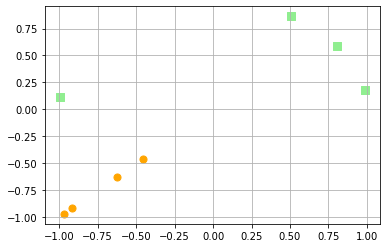

In [56]:
#cluster 0

indices_c0 = cluster == 0
x1 = ds_compress[indices_c0,0] 
y1 = ds_compress[indices_c0,1]

plt.scatter( x1 , y1 , s=50 , c ="lightgreen" , marker = "s" , label = 'cluster0')


indices_c1 = cluster == 1
x1 = ds_compress[indices_c1,1] 
y1 = ds_compress[indices_c1,1]

plt.scatter( x1 , y1 , s=50 , c ="orange" , marker = "o" , label = 'cluster1')
plt.grid()

In [40]:
 ds_fin =  pd.DataFrame(ds_compress , columns = ['x1' , 'y1'])

In [86]:
ds_compress["cluster name"] = y_KMeans 

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices